In [0]:
#Loading marked images from folder and add them to list and sorted them . 
#The images path are being added to a list with natsorted command , 
#after running this code you are going to add all path to a list named markedimage, 
#and more important all the images path are sorted
from natsort import natsorted
import glob
import cv2
import numpy as np
markedimage=[]
for item in glob.glob("/content/Second_marked_inputs/*"):
  markedimage.append(item)
sortedmarkedimage=natsorted(markedimage)

In [0]:
#Check the number of images in your list 
#in this project we have used nearly 300 MRI images 
len(sortedmarkedimage)


In [0]:
#This code has been written by Sebelan Danishvar.
#Our Y- goal to network will be 4 points. So instead of using paint or any other segmentation
#software simply we color points in eyeball . They are not so accurate
#This peice of code would read images from the sortedmarkedimage list and fetch out 2 points 
#which are our intrest then coordinates would be append to four lists lefteyex and lefteyey 
#, righteyex and righteyey ---- Just run the code and you will have real coordinates of all 
#300 images
# This code provide us with our Y-Goal in superwised machine learning 
import matplotlib. pyplot as plt
lefteyex=[]
lefteyey=[]
righteyex=[]
righteyey=[]


for images in sortedmarkedimage:
  img=cv2.imread(images)
  im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  im_R=im_rgb[:,:,0] > 200
  im_G=im_rgb[:,:,1] < 120
  im_B=im_rgb[:,:,2] < 120
  im_total=im_R*im_G*im_B*1
  Points_num=np.sum(im_total)
  if Points_num != 2:
    print('There is an error! We have not got 2 points! Check again')
  [x,y]=np.where(im_total==1)
  P1=[x[0] , y[0]]
  P2=[x[1] , y[1]]
  lefteyex.append(x[0])
  righteyex.append(x[1])
  #here we put a condition to be sure coordinate of right eye in Y-component is larger
  #that y componet of left eye
  if y[0]<y[1]:
    lefteyey.append(y[0])
    righteyey.append(y[1])
  if y[0]>y[1]:
    lefteyey.append(y[1])
    righteyey.append(y[0])

In [0]:
#Test this code to check you have coordinates in a list
lefteyey

In [0]:
#In this peice of code we want to create a empty datafram for having a view from 
#what we have in our hand so please run it
import pandas as pd   
col_names =  ['LEFT EYE X', 'LEFT EYE Y', 'RIGHT EYE X','RIGHT EYE Y']
my_df  = pd.DataFrame(columns = col_names)

In [0]:
#We name our columns as Left EYE X , Left EYE Y, Right EYE X , Right EYE Y Please Run it
my_df['LEFT EYE X']=lefteyex
my_df['LEFT EYE Y']=lefteyey
my_df['RIGHT EYE X']=righteyex
my_df['RIGHT EYE Y']=righteyey

In [0]:
#So here check your data frames the number of all goal outputs training + test --- 
#Please Run the code
my_df

In [0]:
#You can check the number of elements in one column
print(len(my_df['LEFT EYE X']))

300


In [0]:
#Loading MRI images , putting them in order by data fram index and 
#convert them to array we have to read images from path and numbers 
#in the names are corresponding to the row numbers in data fram--- 
#Reading images , append them to list , sort them and convert list to array
from natsort import natsorted
import glob
import cv2
import numpy as np
image=[]
image_1=[]
for i in glob.glob("/content/inputdata1/*.jpg"):
  image.append(i)
images=natsorted(image)
for img in images:
  input_img=cv2.imread(img)
  image_1.append(input_img)
input_images=np.array(image_1)

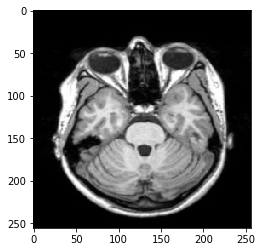

In [0]:
#Check to see image numbers in list and index number are same
plt.imshow(input_images[13,:,:,:])

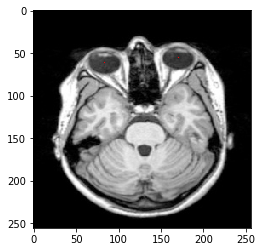

In [0]:
#sortedmarkedimage[13]
plt.imshow(plt.imread(sortedmarkedimage[13]))

In [0]:
#We now scale our images
input_images=input_images/255.0

In [0]:
#Run the code and check the number of elements in input_images array
len(input_images)

In [0]:
#Here we define a function which creates CNN with keras based on the number of demensions 
#----regress=False it would create a CNN for classification and regress=True 
#it would create a CNN for Regression
#But for more accuracy we used the network which as been written by Sebelan Danishvar
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model

def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
	inputShape = (height, width, depth)
	chanDim = -1

	# define the model input
	inputs = Input(shape=inputShape)

	# loop over the number of filters
	for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
		if i == 0:
			x = inputs

		# CONV => RELU => BN => POOL
		x = Conv2D(f, (3, 3), padding="valid")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)

	# flatten the volume, then FC => RELU => BN => DROPOUT
	x = Flatten()(x)
	x = Dense(16)(x)
	x = Activation("relu")(x)
	x = BatchNormalization(axis=chanDim)(x)
	x = Dropout(0.5)(x)

	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
	x = Dense(4)(x)
	x = Activation("relu")(x)

	# check to see if the regression node should be added
	if regress:
		x = Dense(4, activation="linear")(x)

	# construct the CNN
	model = Model(inputs, x)

	# return the CNN
	return model

In [0]:
model=create_cnn(256, 256, 1, filters=(16, 32, 64), regress=True)

In [0]:
#Model Summary of our Network but scroll done and used second network
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 254, 254, 16)      160       
_________________________________________________________________
activation_11 (Activation)   (None, 254, 254, 16)      0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 254, 254, 16)      64        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
activation_12 (Activation)   (None, 125, 125, 32)      0   

In [0]:
#This peice of code has been written by Sebelan Danishvar
#https://scholar.google.com/citations?user=S6jZTFoAAAAJ&hl=en --->Daneshvar 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.advanced_activations import LeakyReLU
from keras import models, layers, optimizers, losses
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import pandas as pd


#df = pd.read_csv(inputPath, sep=" ", header=None, names=cols)
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='valid', strides=2, dilation_rate=1, input_shape=(256,256,1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid', strides=2, dilation_rate=1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid', strides=2, dilation_rate=1))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))
model.add(LeakyReLU(alpha=0.2))
model.add(layers.Dense(4, activation='linear'))   
model.summary()



In [0]:
input_images1=input_images[:,:,:,0]
print(input_images1.shape)

(300, 256, 256)


In [0]:
#partition the data into training and testing splits using 90% of
#the data for training and the remaining 20% for testing
from sklearn.model_selection import train_test_split
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
split = train_test_split(my_df[0:300],input_images1, test_size=0.1, random_state=42)
(trainImagecoordinatex,testimagecoordinatex, trainImagesX,testImagesX) = split
trainY =trainImagecoordinatex 
testY = testimagecoordinatex

In [0]:
#We convert our numpy array to 4dimenssion
print(trainImagesX.shape)
trainImagesX1=np.zeros((270,256,256,1))
trainImagesX1[:,:,:,0]=trainImagesX
print(trainImagesX1.shape)

testImagesX1=np.zeros((30,256,256,1))
testImagesX1[:,:,:,0]=testImagesX
print(testImagesX1.shape)

(270, 256, 256)
(270, 256, 256, 1)
(30, 256, 256, 1)


then compile the model

In [0]:
from keras.optimizers import Adamax
from keras import models, layers, optimizers, losses
# create our Convolutional Neural Network and then compile the model
# using mean absolute percentage error as our loss, implying that we
# seek to minimize the absolute percentage difference between our
# price *predictions* and the *actual prices*
model.compile(optimizer=optimizers.Adamax(), loss= 'mse', metrics= ['mae'])

# train the model

In [0]:
# train the model
#validation_data=(testImagesX, testY)
model.fit(trainImagesX1, trainY,validation_data=(testImagesX1, testY),epochs=50, batch_size=8)

In [0]:
#  ...
model.save("modelconvolutionregression100epoch_myownnetwork.h5")

**With this short peice of code we can have access to the coordinates and image numbers which are splitted as test set**

In [0]:
#These were our results for 30 Images as our test data 
#our mae was 2.8 pixel on 50 epoch 
testY[1:30]

,LEFT EYE X,LEFT EYE Y,RIGHT EYE X,RIGHT EYE Y
266,54,84,55,172
152,53,81,53,171
9,56,79,57,168
233,57,90,60,172
226,63,83,69,180
196,48,84,51,171
109,54,75,56,175
5,48,86,52,172
175,48,80,50,178
237,60,85,61,180


In [0]:
#We test our network on all data with 2.8 pixel mae 

surveydatafram

,ActualLeftX,ActualLeftY,ActualRightX,ActualRightY,PredictionLeftX,PredictionLeftY,PredictionRightX,PredictionRightY
0,68,82,70,175,66,83,67,170
1,55,79,56,173,52,79,55,171
2,46,87,49,178,43,85,47,177
3,61,83,61,166,61,84,64,169
4,52,82,53,172,51,82,54,171
...,...,...,...,...,...,...,...,...
245,57,81,57,175,53,82,56,172
246,54,86,57,168,53,85,55,169
247,65,77,66,170,64,82,66,169
248,69,82,69,169,66,84,68,170


In [0]:

surveydatafram.to_csv('compareresultforalldata_second_prediction_250_newnetwork.csv')